## EDA

## We will remove countries with less than 100 entries from dataset

In [4]:
import numpy as np
import pandas as pd

df=pd.read_csv("dataset/yield_df.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)
country_counts =df['Area'].value_counts()
countries_to_drop = country_counts[country_counts < 100].index.tolist()
df_filtered = df[~df['Area'].isin(countries_to_drop)]
df = df_filtered.reset_index(drop=True)

datacorr=df.copy()
df

Area            Item  Year  hg/ha_yield  \
0       Algeria           Maize  1990        16500   
1       Algeria        Potatoes  1990        78936   
2       Algeria     Rice, paddy  1990        28000   
3       Algeria         Sorghum  1990        16571   
4       Algeria           Wheat  1990         6315   
...         ...             ...   ...          ...   
26292  Zimbabwe     Rice, paddy  2013        22581   
26293  Zimbabwe         Sorghum  2013         3066   
26294  Zimbabwe        Soybeans  2013        13142   
26295  Zimbabwe  Sweet potatoes  2013        22222   
26296  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                               89.0            1828.92     17.48  
1                               89.0            1828.92     17.48  
2                               89.0            1828.92     17.48  
3                               89.0            1828.92     17.48  
4                               89.0            1828.92     17.48  
...                              ...                ...       ...  
26292                          657.0            2550.07     19.76  
26293                          657.0            2550.07     19.76  
26294                          657.0            2550.07     19.76  
26295                          657.0            2550.07     19.76  
26296                          657.0            2550.07     19.76  

[26297 rows x 7 columns]

### 1. Heatmap


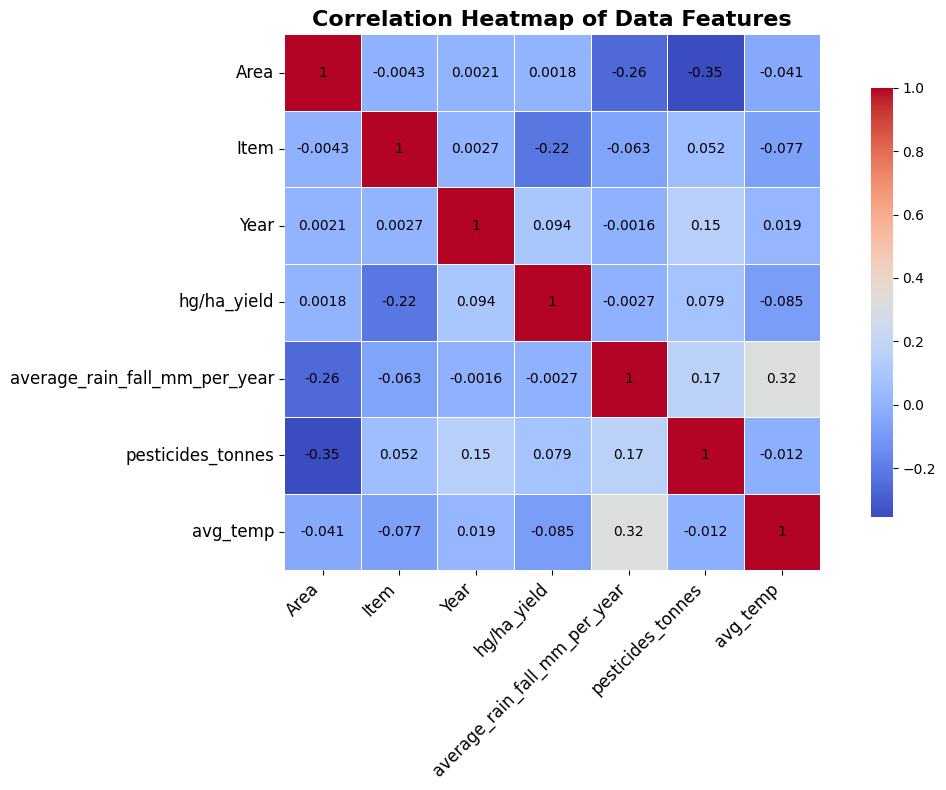

In [6]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Select all categorical columns in the DataFrame
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(datacorr.corr(), 
            annot=True,           # Show correlation values in the cells
            cmap='coolwarm',          # Set color palette
            linewidths=0.5,       
            square=True,        
            cbar_kws={"shrink": 0.8}, # Adjust color bar size
            annot_kws={"size": 10, "color": "black"},  # Customize annotation size and color
                 
            )

plt.title('Correlation Heatmap of Data Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()  

# Display the heatmap
plt.show()


## 2. Histogram


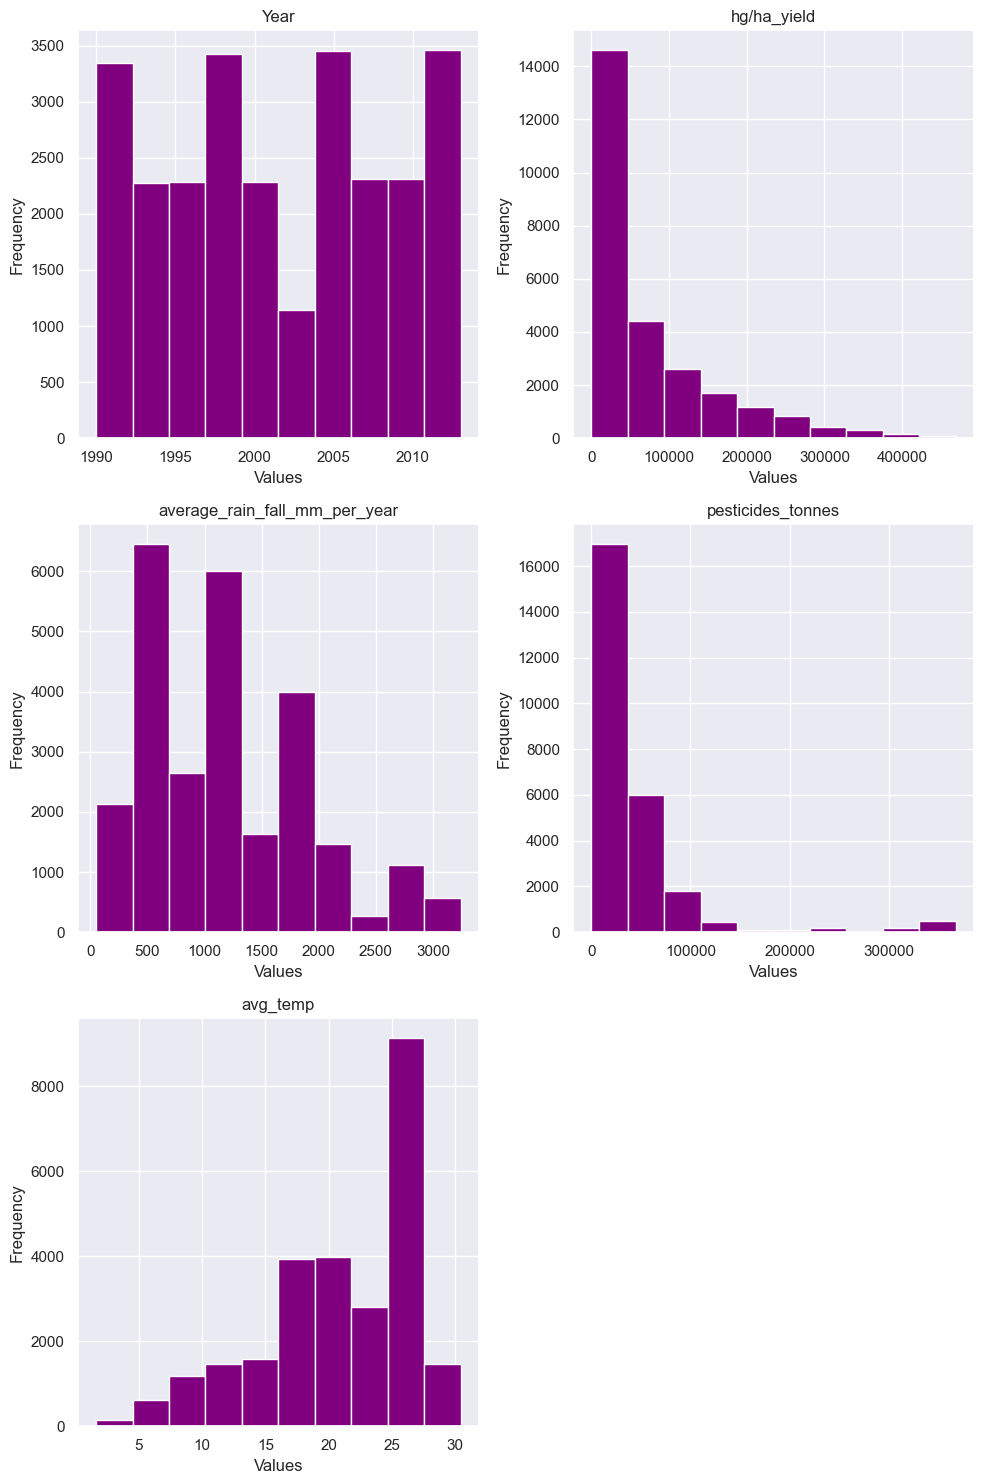

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn palette (this won't directly affect the color of df.hist)
sns.set(palette='viridis')

# Create histograms with the same color for all
axes = df.hist(figsize=(10, 15), color='purple')

# Iterate through the axes to set labels for each subplot
for ax in axes.flatten():
    ax.set_xlabel('Values', fontsize=12)  # X-axis label
    ax.set_ylabel('Frequency', fontsize=12)  # Y-axis label

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 3. Pairplots

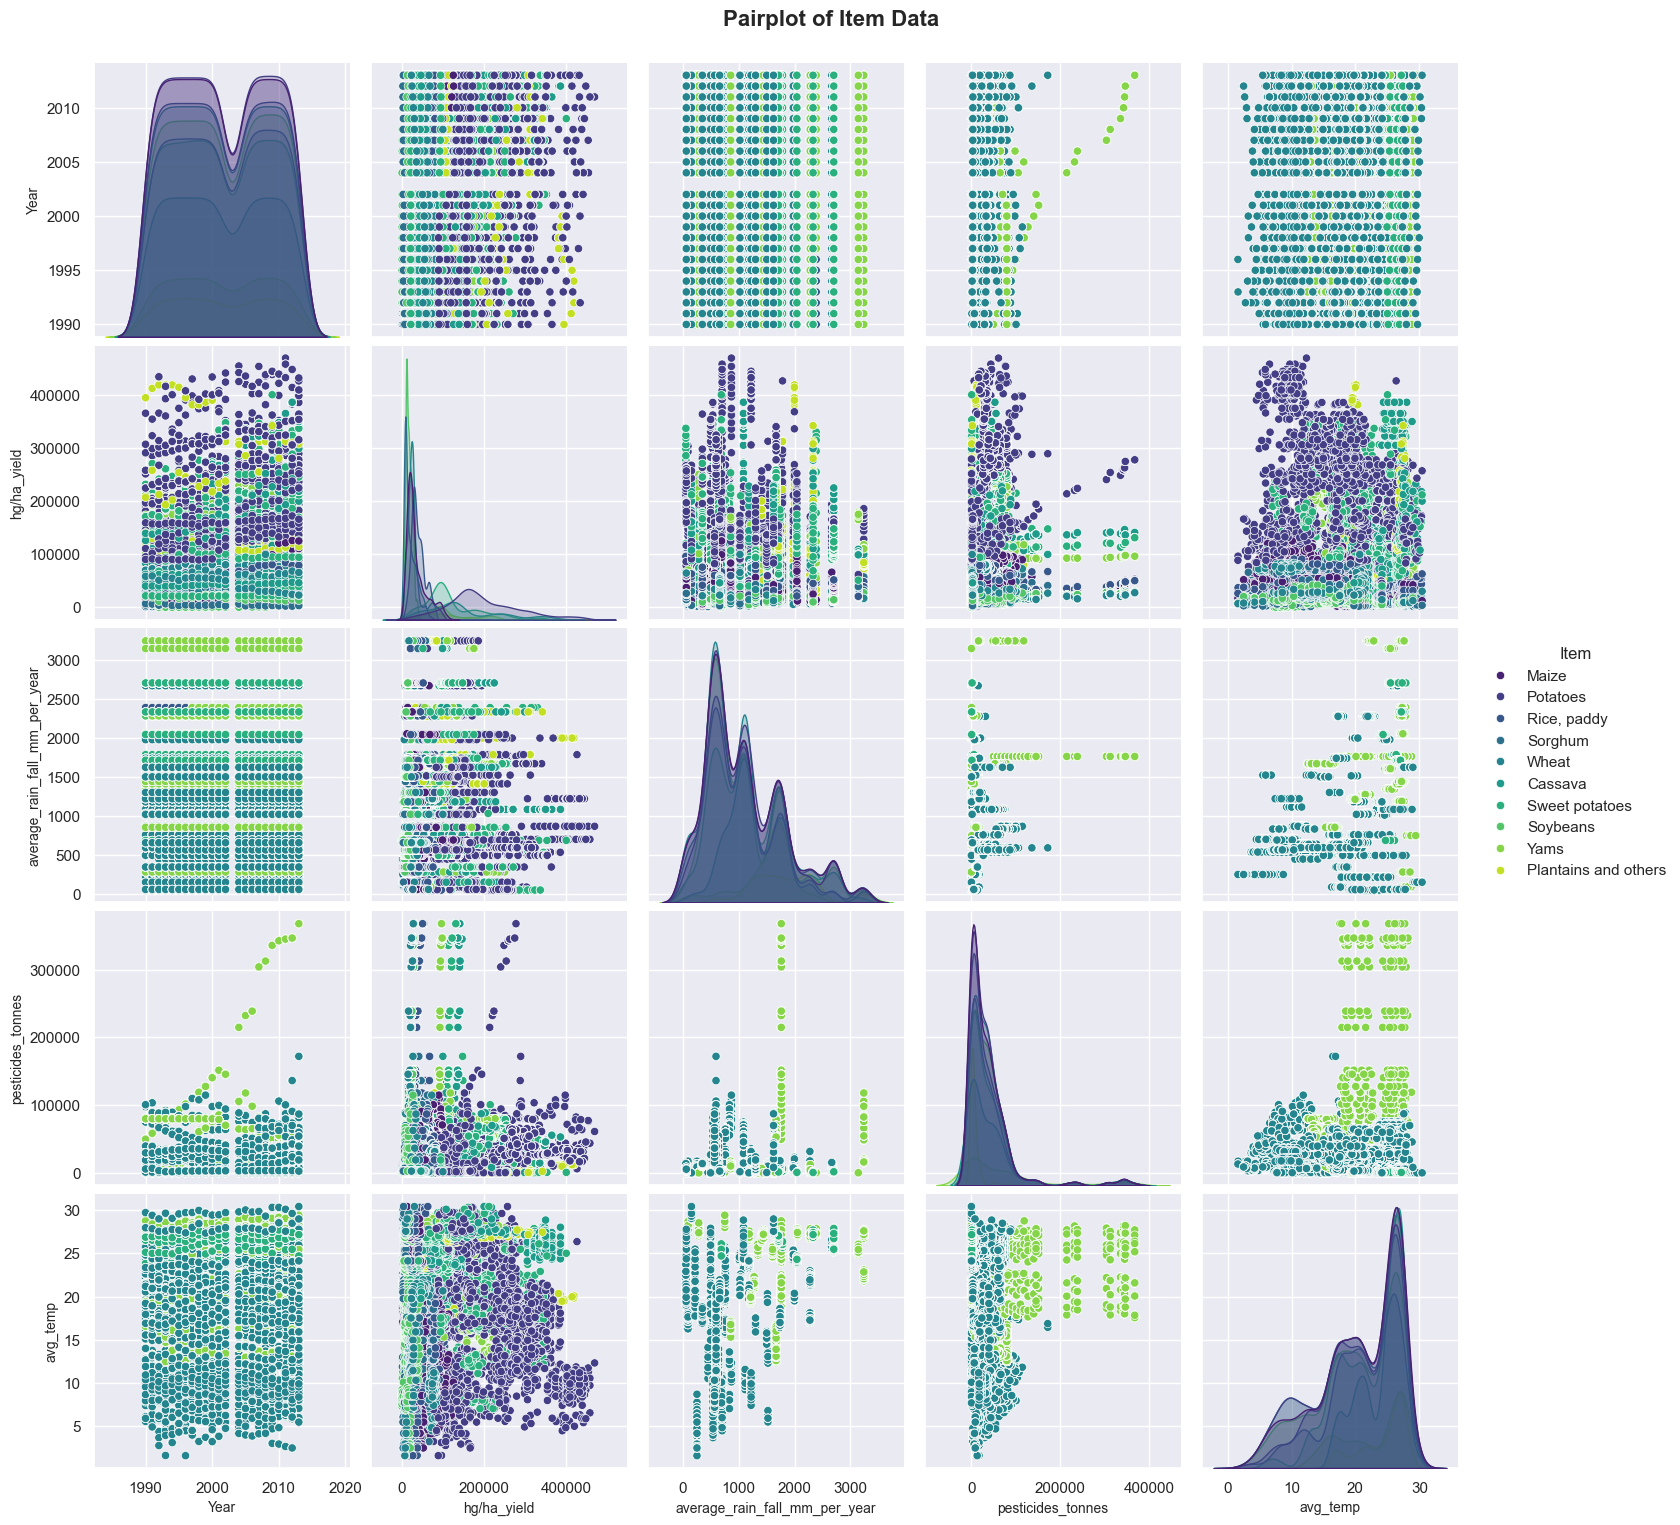

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with hue, kind, and palette, specifying a larger height
pairplot = sns.pairplot(data=df, hue='Item', kind='scatter', palette='viridis', height=3)

# Iterate through the axes to set labels
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)  # Set x-axis label
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)  # Set y-axis label

# Set the title for the entire pairplot
plt.suptitle('Pairplot of Item Data', fontsize=16, fontweight='bold', y=1.02)  # y=1.02 to adjust title position

# Show the plot
plt.show()


## 4. Yield for different crops over the years

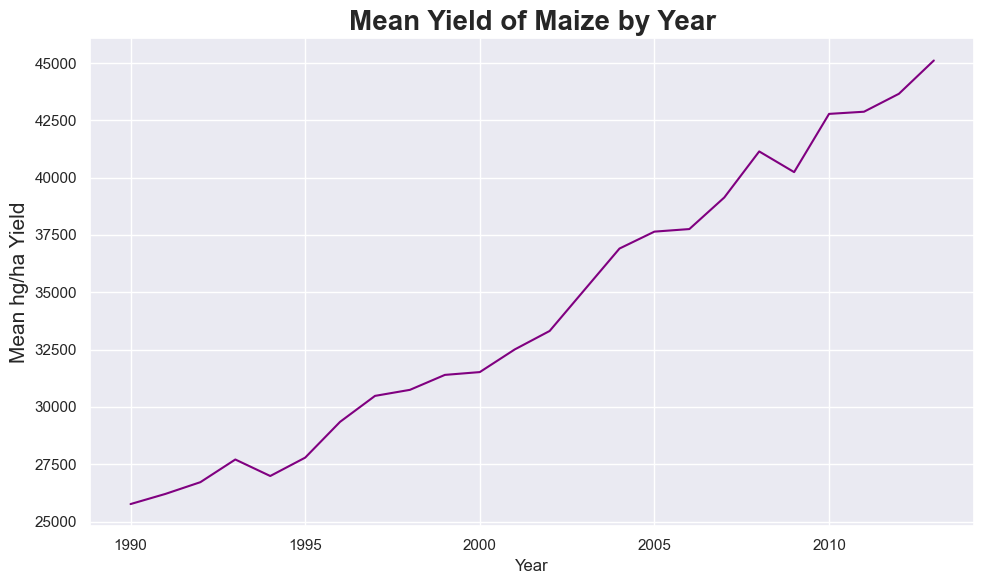

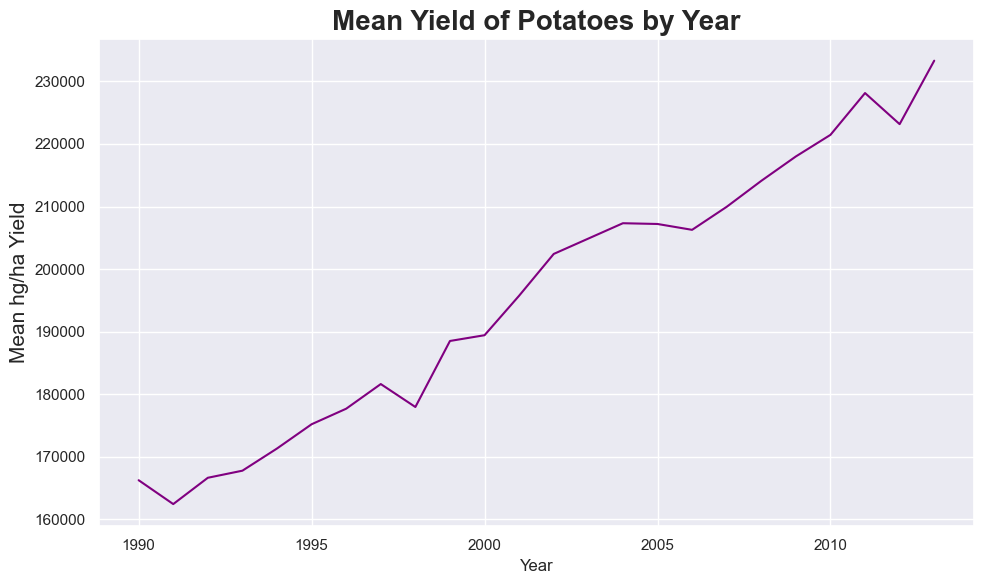

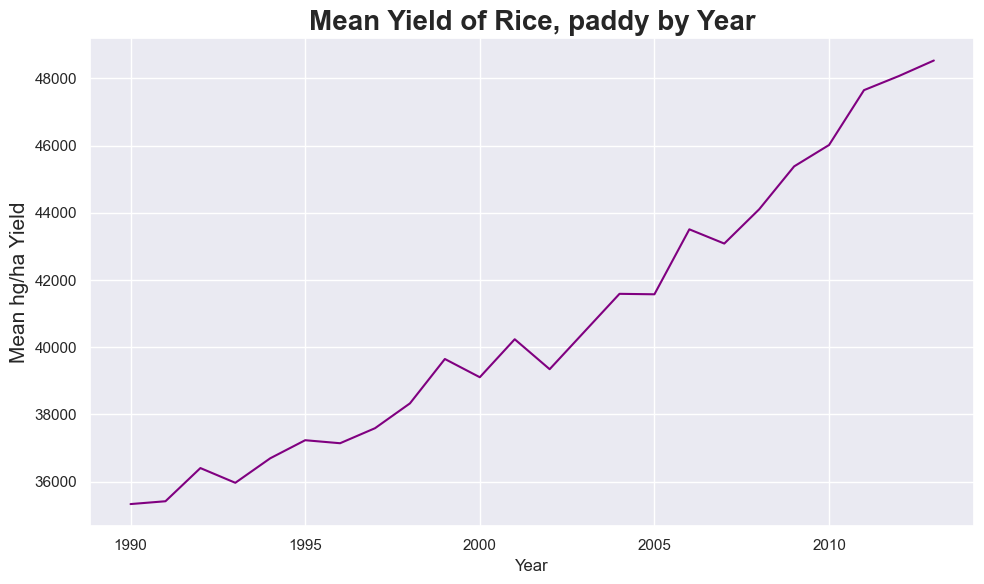

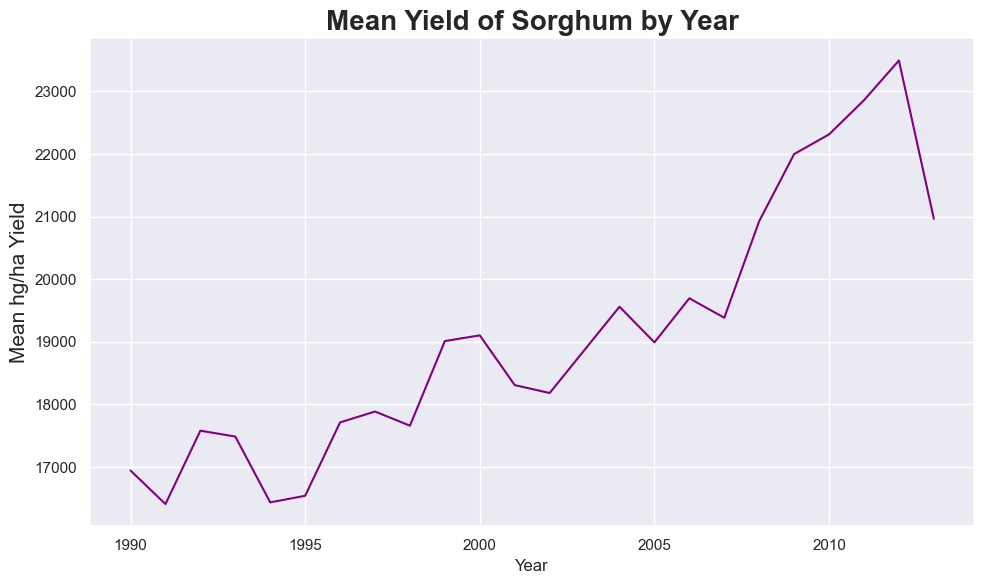

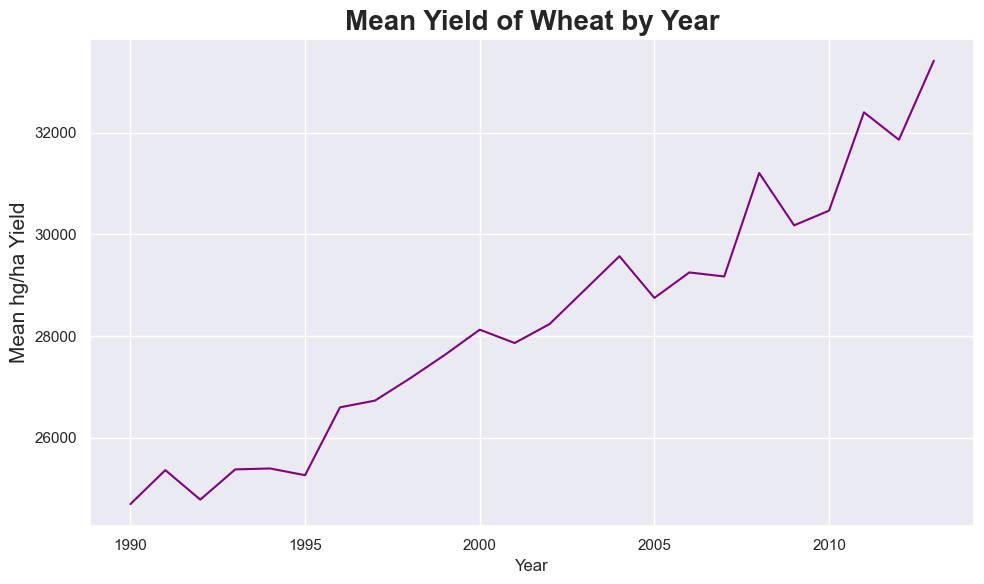

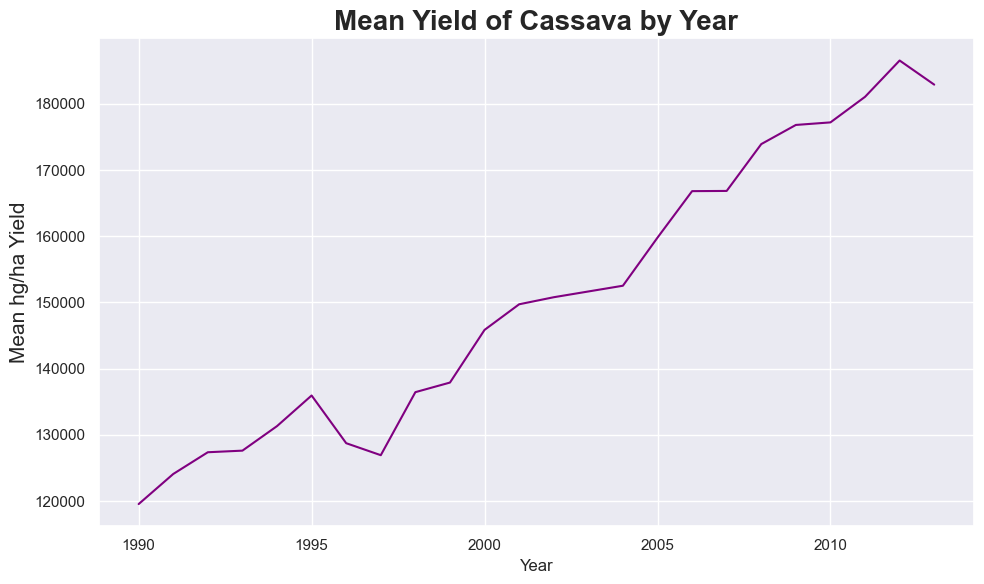

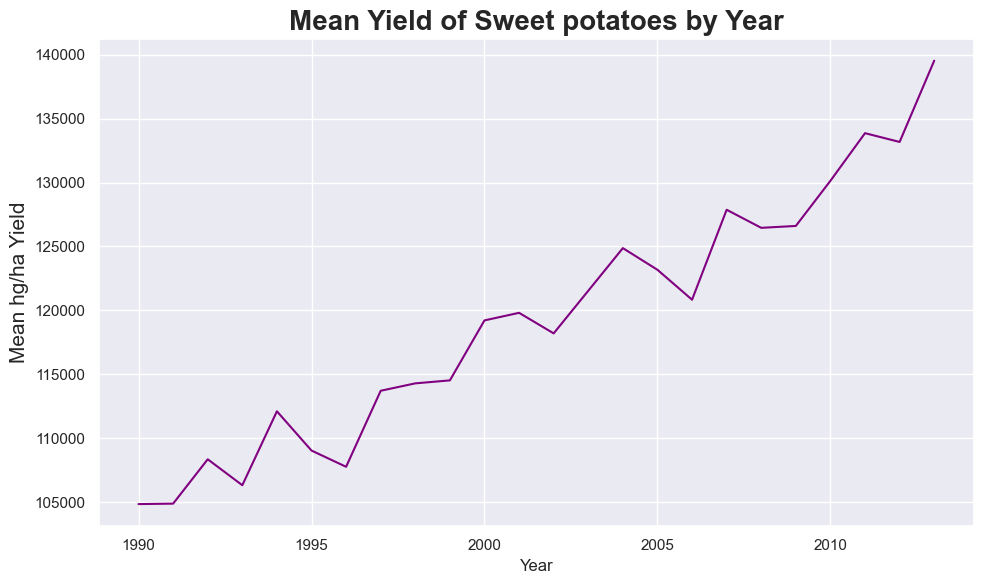

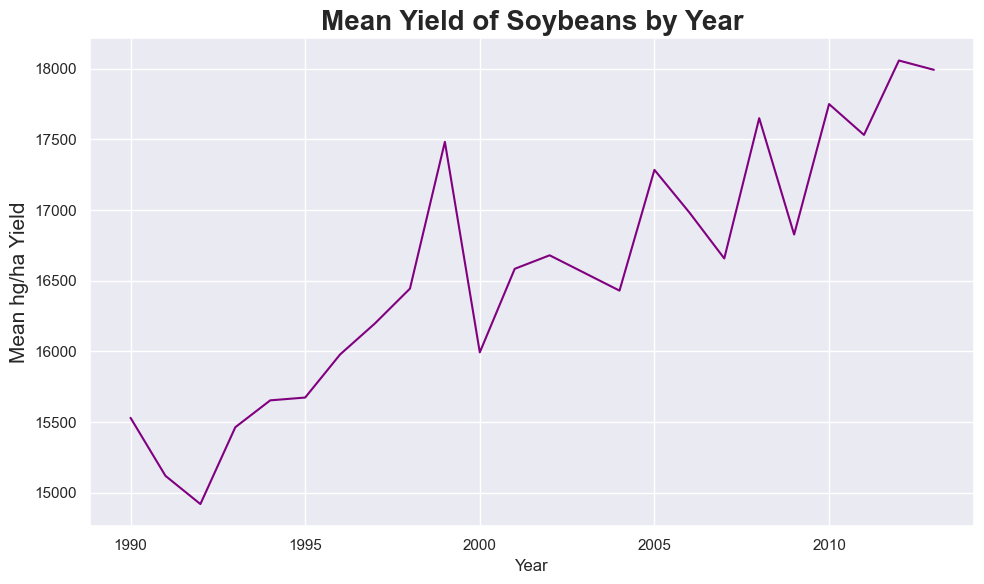

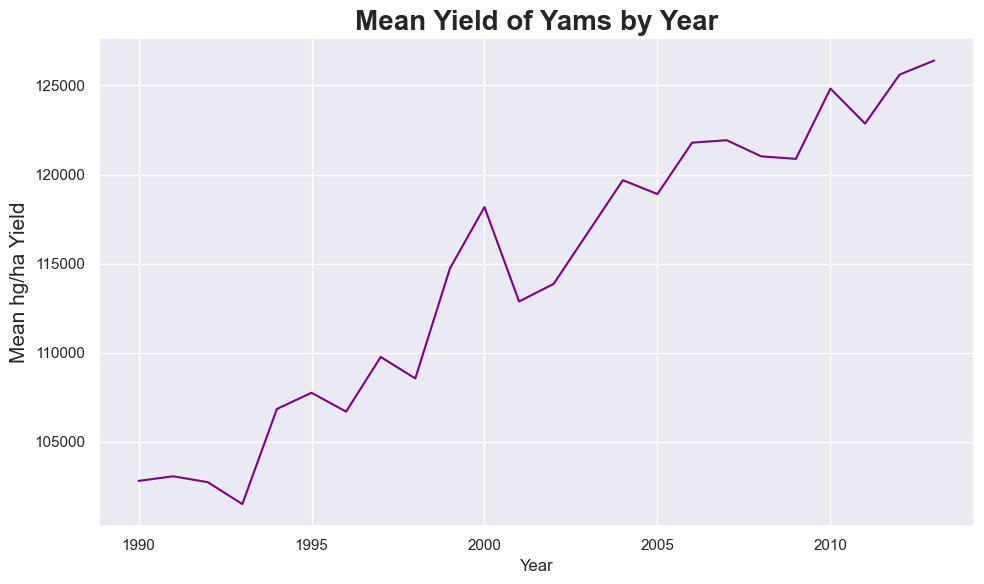

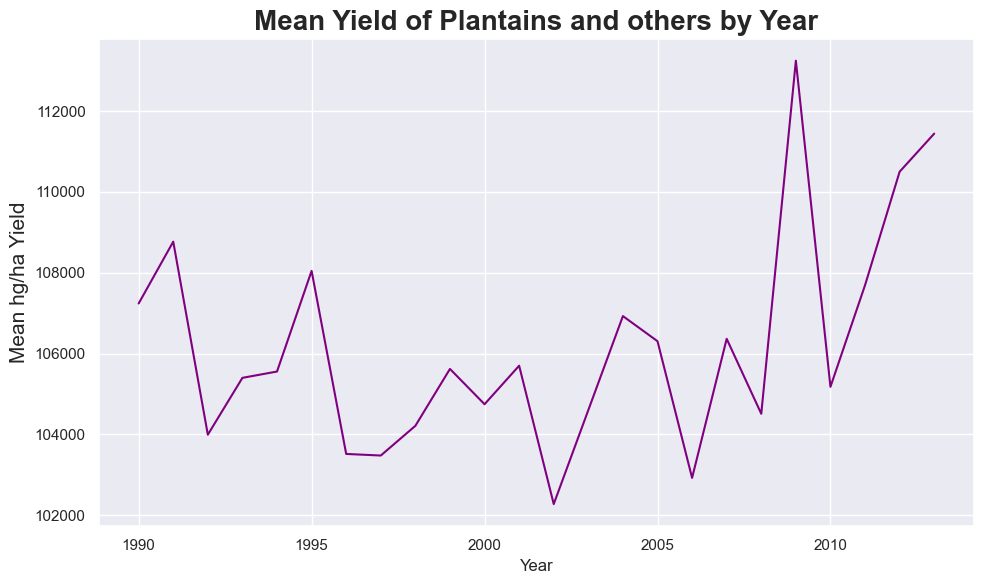

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Get unique items from the DataFrame
unique_items = df['Item'].unique()

# Loop through each unique item and plot the mean yield by year
for item in unique_items:
   
    df_item = df[df['Item'] == item]

    # Group by 'Year' and plot the mean of 'hg/ha_yield'
    ax = df_item.groupby('Year')['hg/ha_yield'].mean().plot(color='purple', figsize=(10, 6))

    ax.set_ylabel('Mean hg/ha Yield', fontsize=15)
    ax.set_title(f'Mean Yield of {item} by Year', fontsize=20, fontweight='bold')

    plt.tight_layout()
    plt.show()


## Different crops Grown in different countries

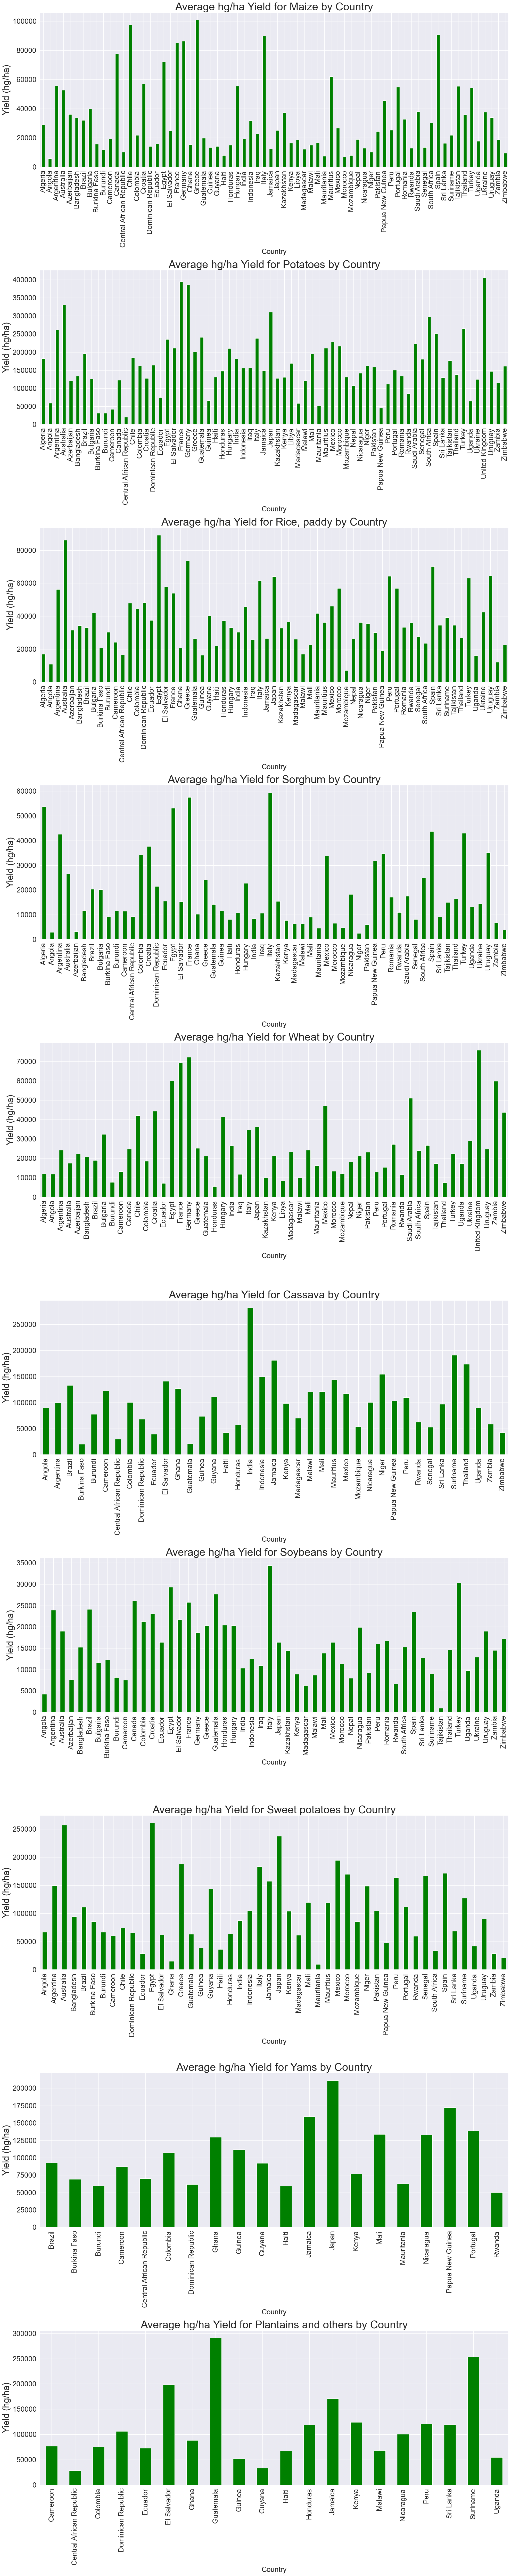

In [10]:

mean_yield_df = df.groupby(['Area', 'Item'])['hg/ha_yield'].mean().reset_index()

# Get unique crops
unique_items = mean_yield_df['Item'].unique()

# Create subplots for each crop
num_crops = len(unique_items)
fig, axs = plt.subplots(nrows=num_crops, figsize=(20, 10 * num_crops))  

# Loop through each unique crop to create individual plots
for i, item in enumerate(unique_items):
    plot_df = mean_yield_df[mean_yield_df['Item'] == item]
    
    # Plotting
    plot_df.plot(kind='bar', x='Area', y='hg/ha_yield', ax=axs[i], color='green', legend=False)
    

    axs[i].set_title(f"Average hg/ha Yield for {item} by Country", fontsize=30)
    axs[i].set_ylabel("Yield (hg/ha)", fontsize=25)
    axs[i].set_xlabel("Country", fontsize=20)
    axs[i].tick_params(axis='x', rotation=90, labelsize=20)
    axs[i].tick_params(axis='y', labelsize=20)

plt.tight_layout()  
plt.show()



## Average Annual Rainfall by Country

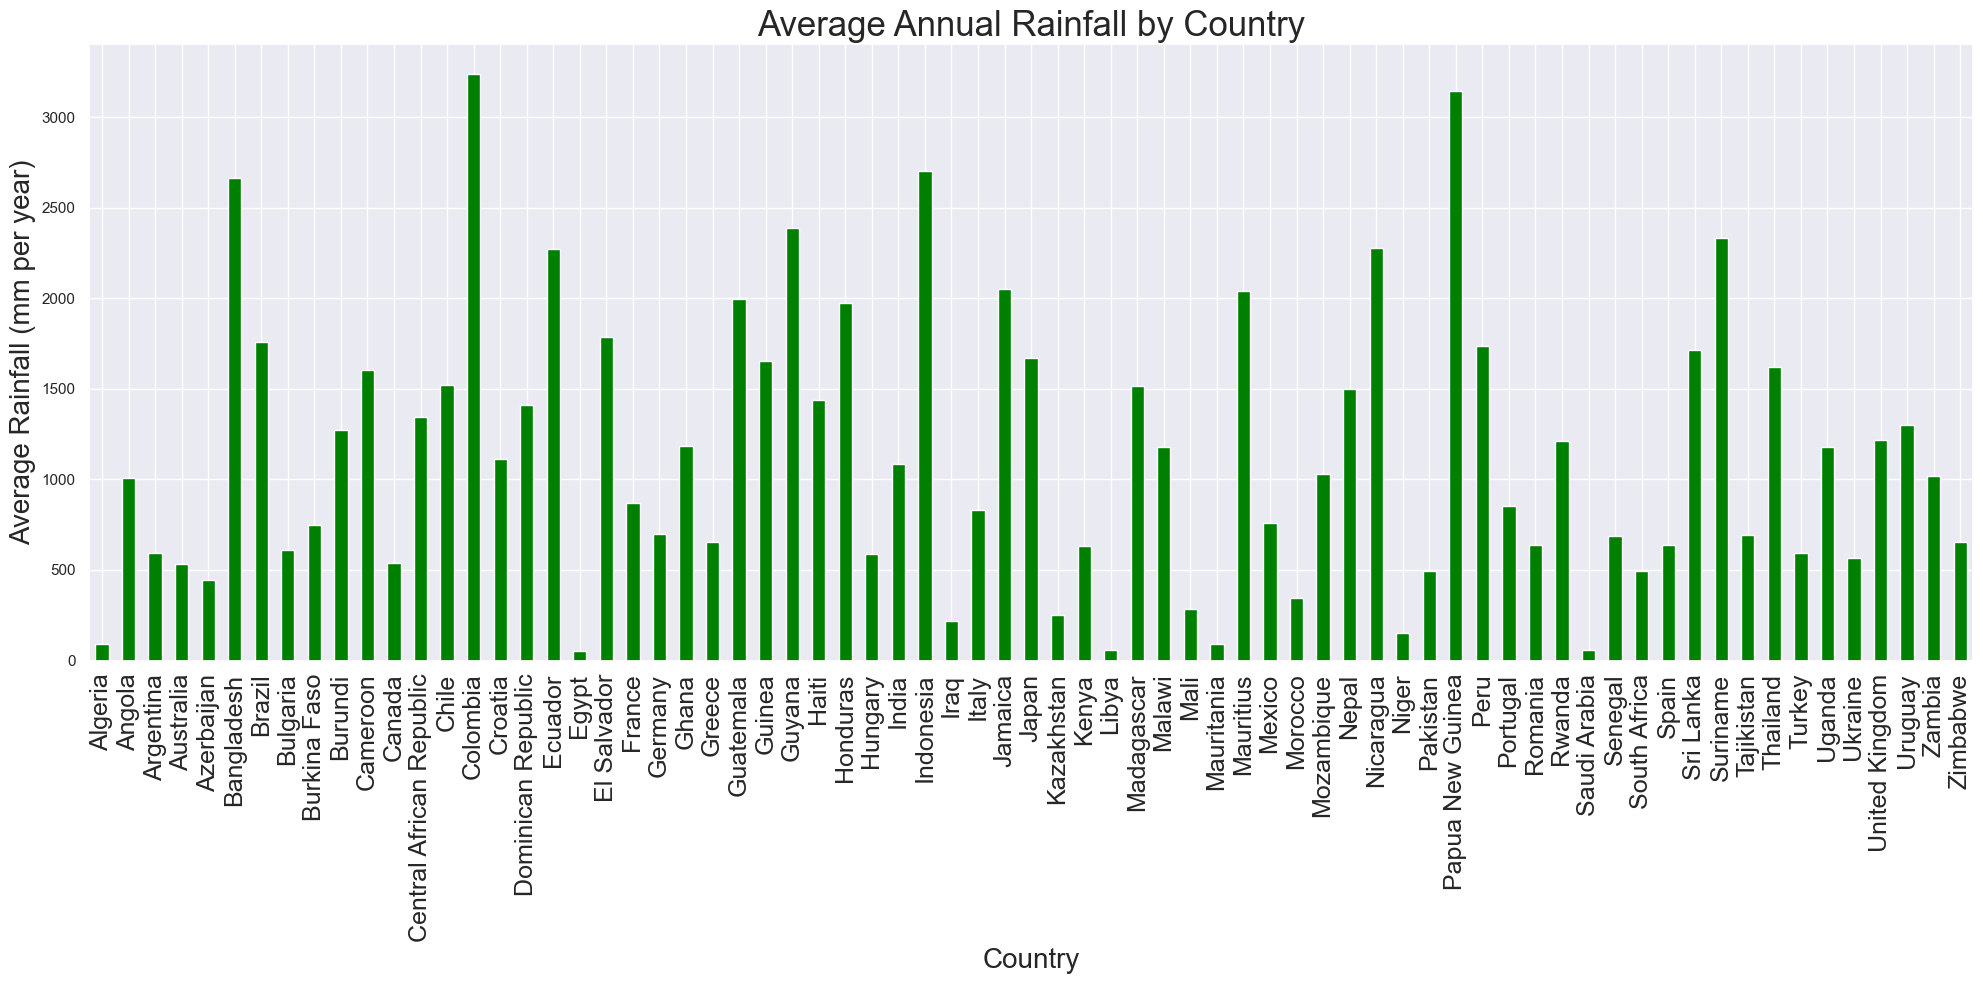

In [11]:
# Grouping by 'Area' and calculating the mean rainfall for all countries
plot_df = df.groupby('Area')['average_rain_fall_mm_per_year'].mean()

# Plotting all countries' rainfall together
plot_df.plot(kind='bar', color='green', figsize=(20, 10))

plt.xticks(rotation=90, fontsize=18)
plt.title("Average Annual Rainfall by Country", fontsize=25)
plt.ylabel("Average Rainfall (mm per year)",fontsize=20)
plt.xlabel("Country",fontsize=20)
plt.tight_layout()  
plt.show()


## Average Annual Pesticides Usage by Country (Tonnes)

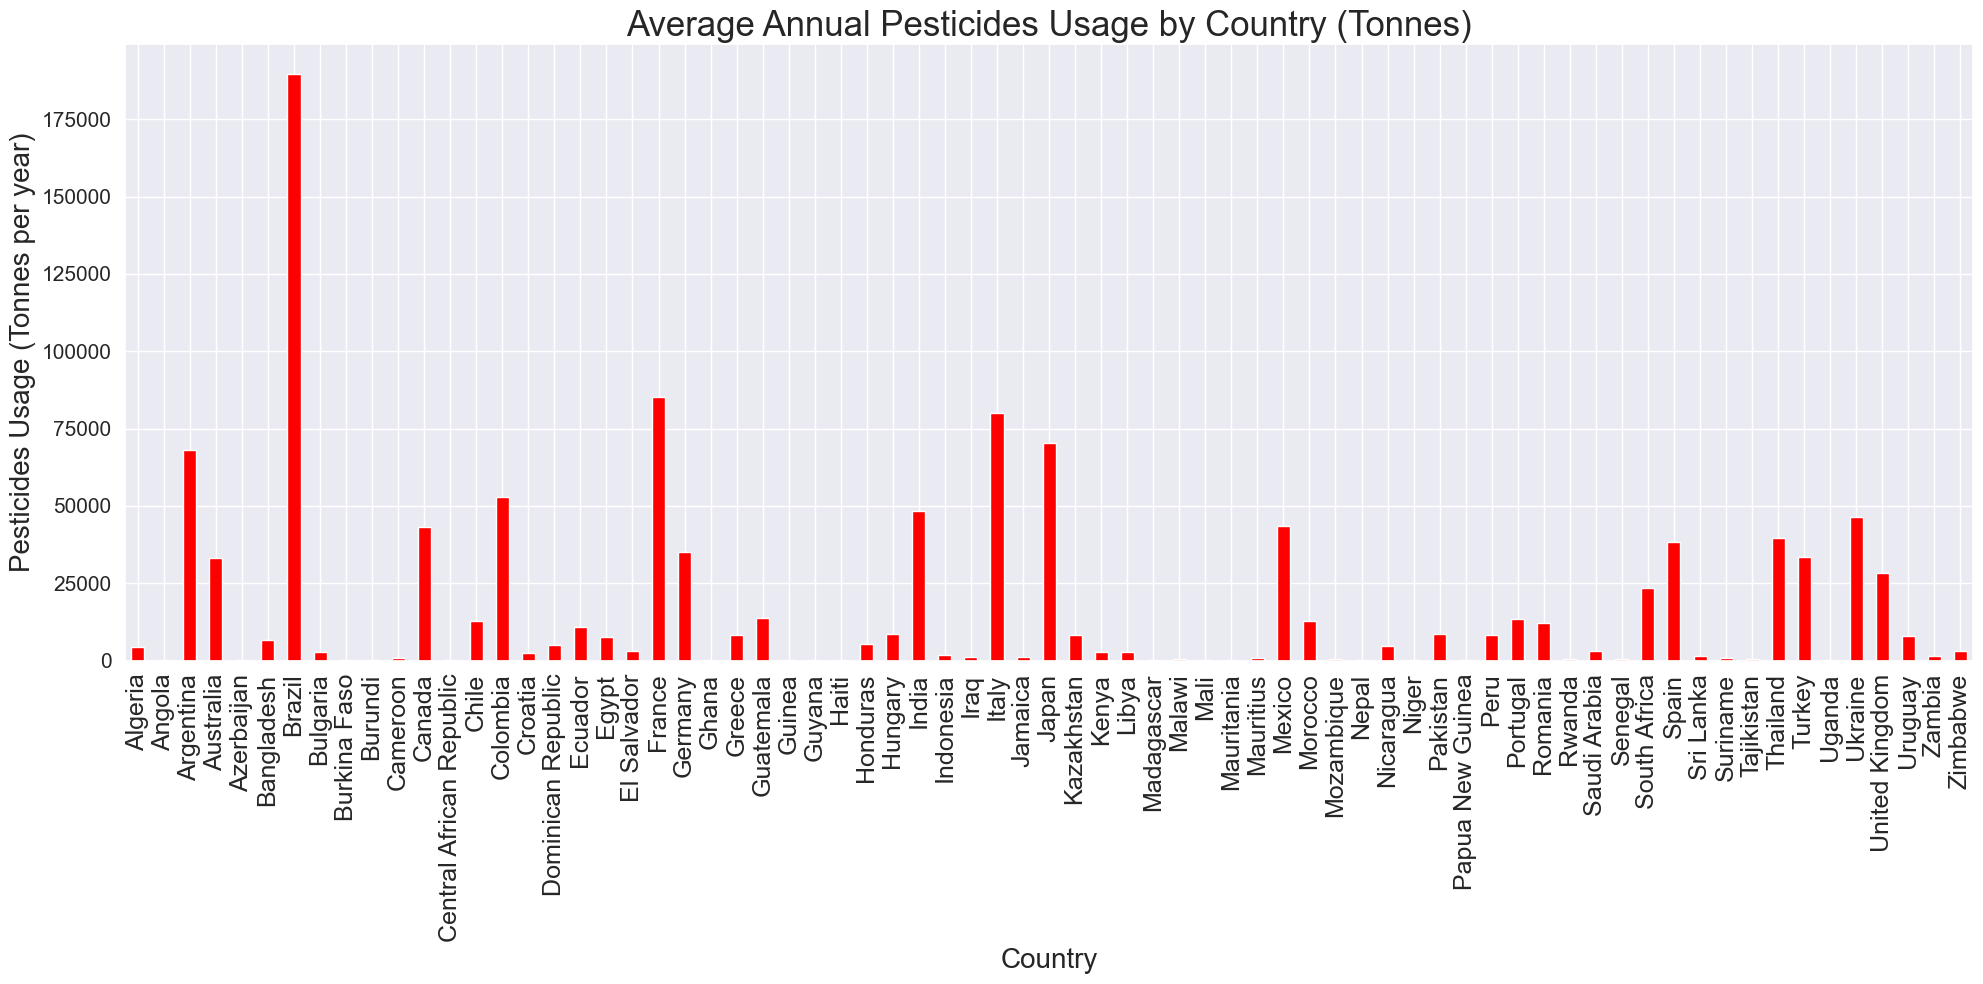

In [12]:
import matplotlib.pyplot as plt

# Grouping by 'Area' and calculating the mean pesticide usage for all countries
plot_df = df.groupby('Area')['pesticides_tonnes'].mean()

# Plotting all countries' pesticide usage together 
fig, ax = plt.subplots(figsize=(20, 10))  
plot_df.plot(kind='bar', color='red', ax=ax)

plt.xticks(rotation=90, fontsize=18)  
plt.yticks(fontsize=15)                
plt.title("Average Annual Pesticides Usage by Country (Tonnes)", fontsize=25)  
plt.ylabel("Pesticides Usage (Tonnes per year)", fontsize=20)  
plt.xlabel("Country", fontsize=20)     

plt.tight_layout()  
plt.show()


## Does pesticides affect yield production?
We will create varuious visualizations to explore correlation between pesticide use and crop yield. By analyzing these illustrations, we aim to uncover insights into how varying levels of pesticide application may impact agricultural productivity and determine whether a relationship exists between these two crucial factors

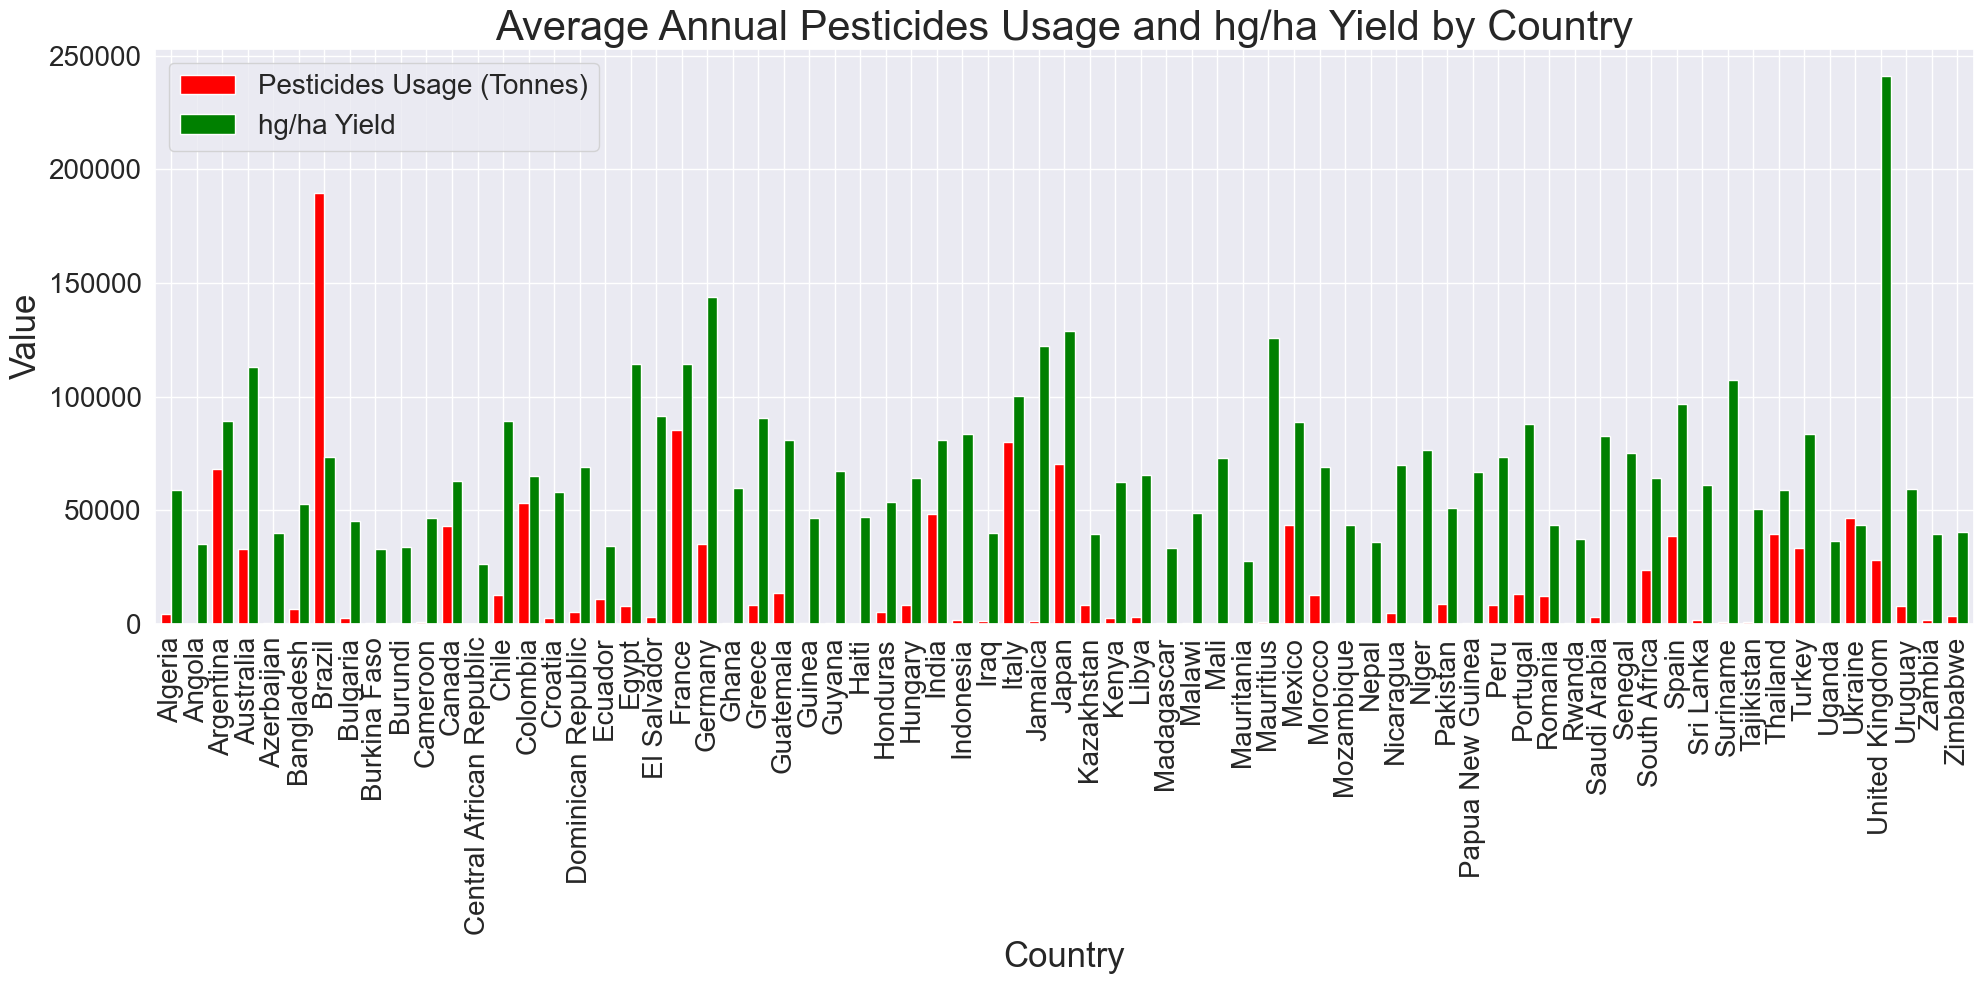

In [13]:
import matplotlib.pyplot as plt

mean_df = df.groupby('Area')[['pesticides_tonnes', 'hg/ha_yield']].mean()

fig, ax = plt.subplots(figsize=(20, 10))

mean_df.plot(kind='bar', ax=ax, color=['red', 'green'], width=0.8)

ax.set_title("Average Annual Pesticides Usage and hg/ha Yield by Country", fontsize=30)
ax.set_ylabel("Value", fontsize=25)
ax.set_xlabel("Country", fontsize=25)
ax.tick_params(axis='x', rotation=90, labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.legend(["Pesticides Usage (Tonnes)", "hg/ha Yield"], fontsize=20)

plt.tight_layout()
plt.show()


## Preprocessing
###  One-Hot Encoding  

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


categorical_columns = ['Area', 'Item']  
target_column = 'hg/ha_yield'  

X, y = datacorr.drop(labels=target_column, axis=1), datacorr[target_column]

# One-Hot Encoding on categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough' 
)

# Apply the transformation on the feature set
X_encoded = preprocessor.fit_transform(X)

## Model Training

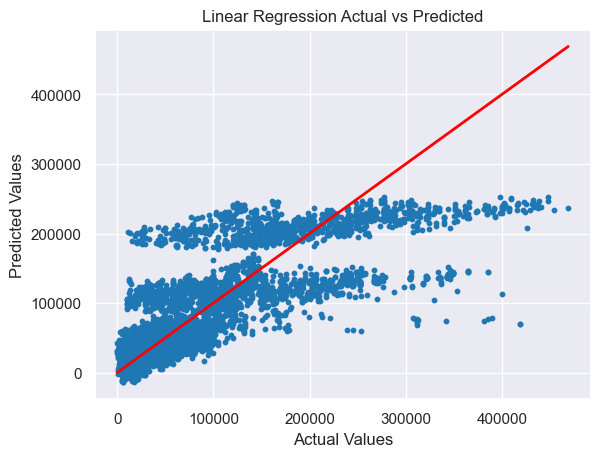

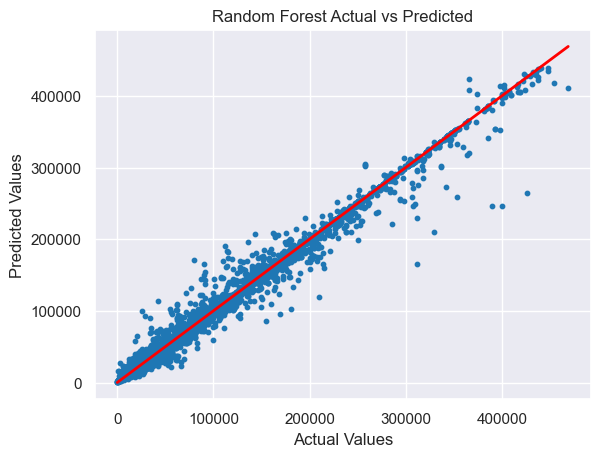

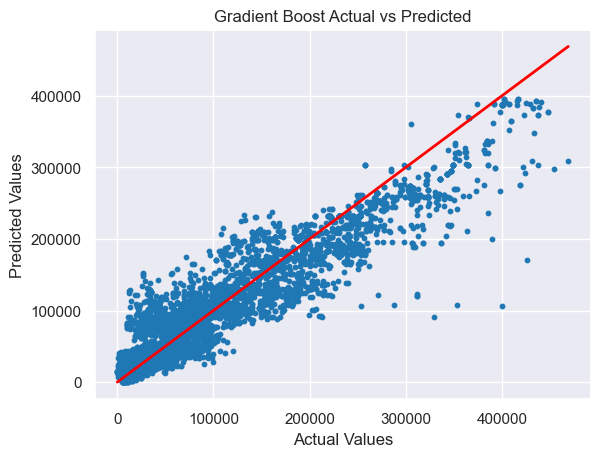

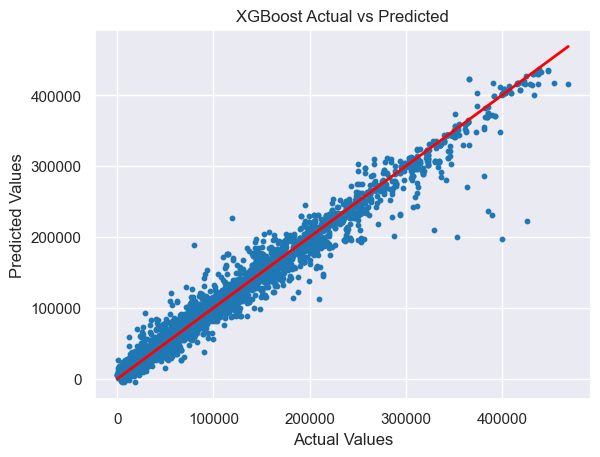

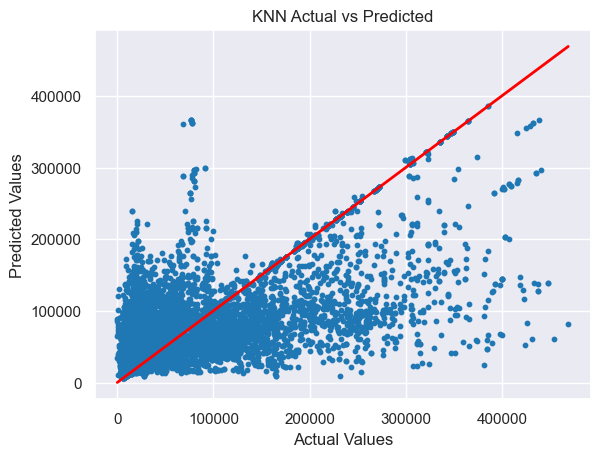

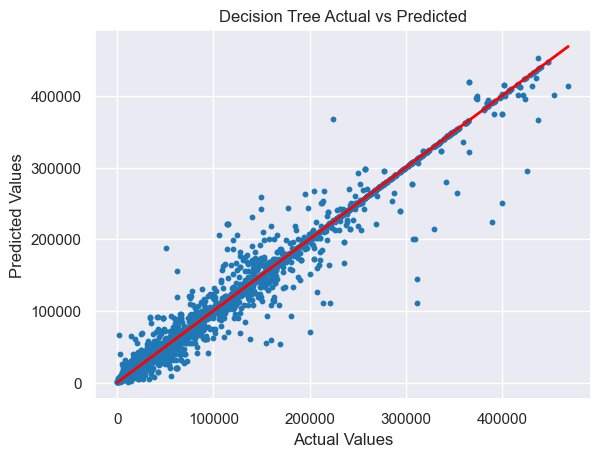

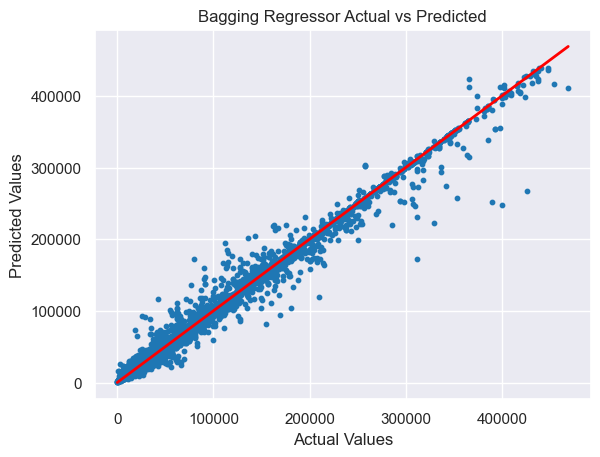

               Model  Accuracy           MSE  R2_score
0  Linear Regression  0.654388  2.348310e+09  0.654388
1      Random Forest  0.988979  7.488503e+07  0.988979
2     Gradient Boost  0.885307  7.792969e+08  0.885307
3            XGBoost  0.980328  1.336641e+08  0.980328
4                KNN  0.346084  4.443129e+09  0.346084
5      Decision Tree  0.983633  1.112077e+08  0.983633
6  Bagging Regressor  0.989142  7.377894e+07  0.989142


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
import pandas as pd

# Split features and target variable
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# List of models to train
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

# Train models and evaluate
results = []

for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    accuracy = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results.append((name, accuracy, mse, r2))
    
    # Plot actual vs predicted values
    plt.scatter(y_test, y_pred, s=10, color='#1f77b4')  # Change color if needed
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{name} Actual vs Predicted')
    plt.show()

# Display results in a DataFrame
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])

# Highlight best and worst performing models
df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'MSE', 'R2_score'])
print(df_results)

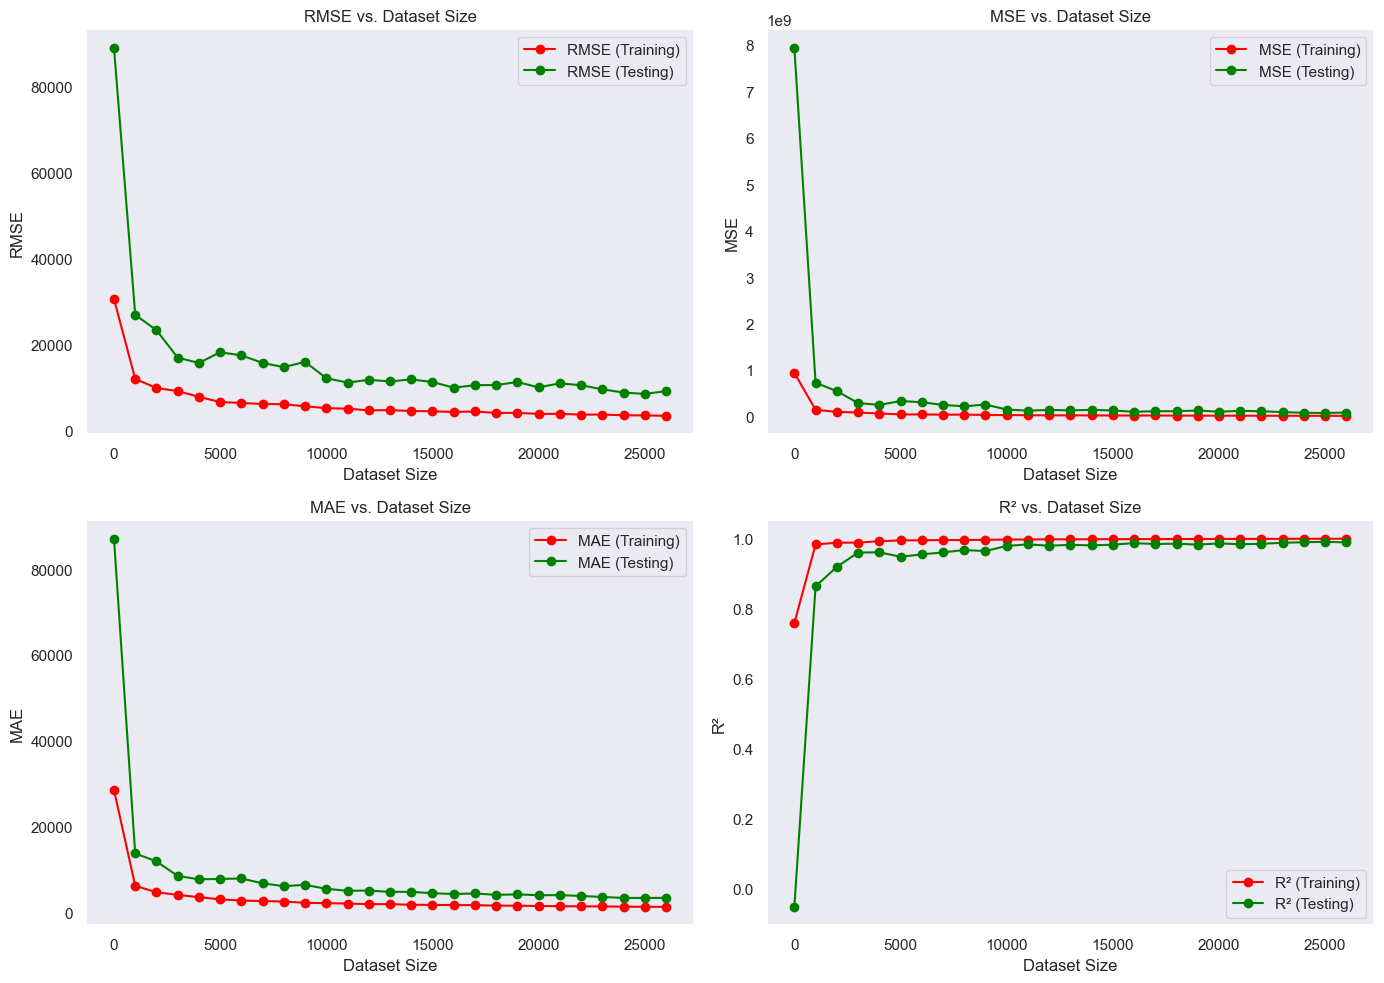

In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'datacorr' DataFrame is already loaded
categorical_columns = ['Area', 'Item']  
target_column = 'hg/ha_yield'  

X, y = datacorr.drop(labels=target_column, axis=1), datacorr[target_column]

# One-Hot Encoding on categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough' 
)

# Store metrics for training and testing
train_sizes = []
rmse_train_list = []
rmse_test_list = []
mse_train_list = []
mse_test_list = []
mae_train_list = []
mae_test_list = []
r2_train_list = []
r2_test_list = []

# Loop through varying dataset sizes
for size in range(10, len(datacorr), 1000):  # Adjusted range for fewer iterations
    # Sample data
    sampled_data = datacorr.sample(n=size, random_state=1)
    X_sampled = sampled_data.drop(labels=target_column, axis=1)
    y_sampled = sampled_data[target_column]

    # Apply the transformation on the feature set
    X_encoded = preprocessor.fit_transform(X_sampled)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_sampled, test_size=0.3, random_state=42)

    # Initialize RandomForestRegressor with fewer estimators
    model = RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)  # Reduced n_estimators

    # Train the model
    model.fit(X_train, y_train)

    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics for train and test
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    train_sizes.append(size)
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    mae_train_list.append(mae_train)
    mae_test_list.append(mae_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)

# Plotting metrics vs. Dataset Size
plt.figure(figsize=(14, 10))

# RMSE plot
plt.subplot(2, 2, 1)
plt.plot(train_sizes, rmse_train_list, label='RMSE (Training)', marker='o', color='red')
plt.plot(train_sizes, rmse_test_list, label='RMSE (Testing)', marker='o', color='green')
plt.title('RMSE vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.legend()
plt.grid()

# MSE plot
plt.subplot(2, 2, 2)
plt.plot(train_sizes, mse_train_list, label='MSE (Training)', marker='o', color='red')
plt.plot(train_sizes, mse_test_list, label='MSE (Testing)', marker='o', color='green')
plt.title('MSE vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('MSE')
plt.legend()
plt.grid()

# MAE plot
plt.subplot(2, 2, 3)
plt.plot(train_sizes, mae_train_list, label='MAE (Training)', marker='o', color='red')
plt.plot(train_sizes, mae_test_list, label='MAE (Testing)', marker='o', color='green')
plt.title('MAE vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('MAE')
plt.legend()
plt.grid()

# R² plot
plt.subplot(2, 2, 4)
plt.plot(train_sizes, r2_train_list, label='R² (Training)', marker='o', color='red')
plt.plot(train_sizes, r2_test_list, label='R² (Testing)', marker='o', color='green')
plt.title('R² vs. Dataset Size')
plt.xlabel('Dataset Size')
plt.ylabel('R²')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


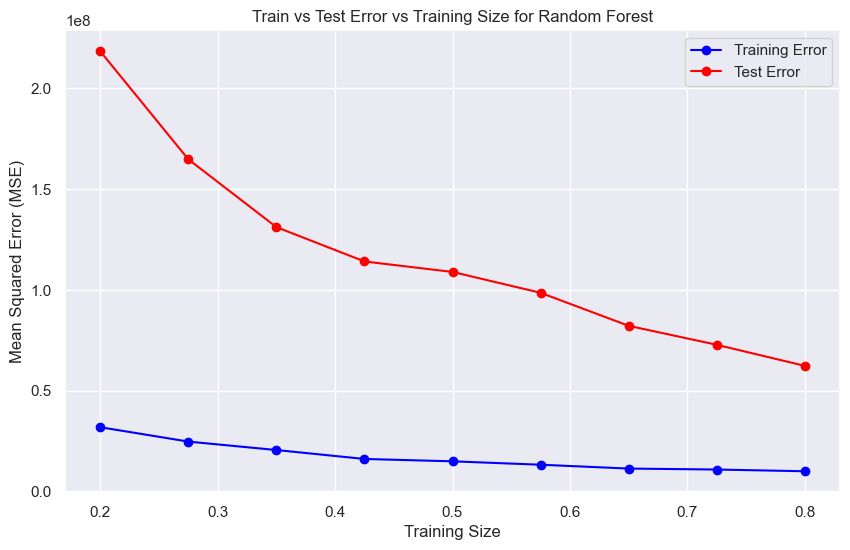

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'datacorr' DataFrame is already loaded
categorical_columns = ['Area', 'Item']  
target_column = 'hg/ha_yield'  

# Define features (X) and target (y)
X, y = datacorr.drop(labels=target_column, axis=1), datacorr[target_column]

# One-Hot Encoding on categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough' 
)

# Apply the transformation on the feature set
X_encoded = preprocessor.fit_transform(X)

# Define training sizes to evaluate (from 20% to 80%)
train_sizes = np.linspace(0.2, 0.8, 9)  # Training sizes from 20% to 80%

train_errors = []
test_errors = []

# Loop through each training size and calculate errors
for train_size in train_sizes:
    # Split the dataset with a fixed test size (e.g., 20%)
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, train_size=train_size, test_size=1 - train_size, random_state=42)
    
    # Train Random Forest model
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

# Plot train and test errors vs training size
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error', marker='o', color='blue')
plt.plot(train_sizes, test_errors, label='Test Error', marker='o', color='red')
plt.xlabel('Training Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train vs Test Error vs Training Size for Random Forest')
plt.legend()
plt.grid(True)
plt.show()


## CROSS VALIDATION

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

results = []

models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=150, random_state=42))
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, mae, r2))
    
    print(name)
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)
    
    for fold, score in enumerate(scores):
        print(f"Fold {fold+1}: {score:.4f}")
    
    mean_score = np.mean(scores)
    print(f"Mean R2 Score: {mean_score:.4f}")
    print('-' * 30)

# Convert results to a DataFrame for sorting
df = pd.DataFrame(results, columns=['Model', 'MSE', 'MAE', 'R2 Score'])

# Find the best and worst for each metric
best_mse = df.loc[df['MSE'].idxmin()]
best_mae = df.loc[df['MAE'].idxmin()]
best_r2 = df.loc[df['R2 Score'].idxmax()]
worst_mse = df.loc[df['MSE'].idxmax()]
worst_mae = df.loc[df['MAE'].idxmax()]
worst_r2 = df.loc[df['R2 Score'].idxmin()]

# Print the results in a formatted table
print("\nModel Performance Summary:")
print(f"{'Model':<20}{'MSE':<15}{'MAE':<15}{'R2 Score':<15}")
print("-" * 60)
for index, row in df.iterrows():
    print(f"{row['Model']:<20}{row['MSE']:<15.4f}{row['MAE']:<15.4f}{row['R2 Score']:<15.4f}")

print("\nBest Performers:")
print(f"Best MSE: {best_mse['Model']} (MSE={best_mse['MSE']:.4f})")
print(f"Best MAE: {best_mae['Model']} (MAE={best_mae['MAE']:.4f})")
print(f"Best R2 Score: {best_r2['Model']} (R2 Score={best_r2['R2 Score']:.4f})")

print("\nWorst Performers:")
print(f"Worst MSE: {worst_mse['Model']} (MSE={worst_mse['MSE']:.4f})")
print(f"Worst MAE: {worst_mae['Model']} (MAE={worst_mae['MAE']:.4f})")
print(f"Worst R2 Score: {worst_r2['Model']} (R2 Score={worst_r2['R2 Score']:.4f})")


Linear Regression
Fold 1: 0.6531
Fold 2: 0.6520
Fold 3: 0.6296
Fold 4: 0.6379
Fold 5: 0.6575
Mean R2 Score: 0.6460
------------------------------
Random Forest
Fold 1: 0.9864
Fold 2: 0.9839
Fold 3: 0.9836
Fold 4: 0.9873
Fold 5: 0.9856
Mean R2 Score: 0.9854
------------------------------
Gradient Boost
Fold 1: 0.8967
Fold 2: 0.8885
Fold 3: 0.8891
Fold 4: 0.8919
Fold 5: 0.8938
Mean R2 Score: 0.8920
------------------------------
XGBoost
Fold 1: 0.9791
Fold 2: 0.9742
Fold 3: 0.9778
Fold 4: 0.9801
Fold 5: 0.9775
Mean R2 Score: 0.9777
------------------------------
KNN
Fold 1: 0.3476
Fold 2: 0.3737
Fold 3: 0.3635
Fold 4: 0.3049
Fold 5: 0.3295
Mean R2 Score: 0.3438
------------------------------
Decision Tree
Fold 1: 0.9800
Fold 2: 0.9731
Fold 3: 0.9754
Fold 4: 0.9785
Fold 5: 0.9717
Mean R2 Score: 0.9757
------------------------------
Bagging Regressor
Fold 1: 0.9866
Fold 2: 0.9834
Fold 3: 0.9834
Fold 4: 0.9872
Fold 5: 0.9857
Mean R2 Score: 0.9853
------------------------------

Model Perfor